In [27]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
sn.set(font_scale=1.1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
import gmaps
import gmaps.datasets
from ipywidgets.embed import embed_minimal_html
from sklearn.metrics import mean_absolute_error
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
def statistics(path):
    waiting = []
    transfers = []
    duration = []

    for i in range(1, 11):
        filepath = path + str(i) + ".csv"
        df = pd.read_csv(filepath)
        waiting_list = df['waiting_time'].tolist()
        transfer_list = df['transfers'].tolist()
        duration_list = df['duration'].tolist()
        waiting += waiting_list
        transfers += transfer_list
        duration += duration_list

    waiting_round = [round(x) for x in waiting]
    transfers_round = [round(x) for x in transfers]
    duration_round = [round(x) for x in duration]

    return waiting_round, transfers_round, duration_round

In [7]:
waiting1, transfers1, duration1 = statistics("../../Results/Sc1Weekend/8/passengers_h8_sc1week_i")
waiting2, transfers2, duration2 = statistics("../../Results/Sc2Weekend/8/passengers_h8_sc2week_i")
waiting3, transfers3, duration3 = statistics("../../Results/Sc1Week/8/passengers_h8_sc1week_i")
waiting4, transfers4, duration4 = statistics("../../Results/Sc2Week/8/passengers_h8_sc2week_i")
Counter(transfers4)

Counter({1: 87421, 0: 90111, 2: 15448})

In [8]:
df1 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 1', 
                    'Day': 'Weekends', 'Count': [15022, 15011, 2197]})
df2 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 2', 
                    'Day': 'Weekends', 'Count': [15015, 14942, 2273]})
df3 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 1', 
                    'Day': 'Weekdays', 'Count': [90029, 87429, 15522]})
df4 = pd.DataFrame({'Transfers': [0, 1, 2], 'Scenario': 'Scenario 2', 
                    'Day': 'Weekdays', 'Count': [90111, 87421, 15448]})

[Text(0,0,'Scenario 1'), Text(0,0,'Scenario 2')]

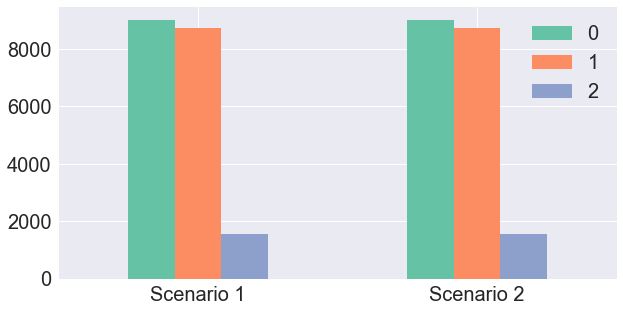

In [11]:
index = ["Scenario 1", "Scenario 2"]

df = pd.DataFrame({'0': [9002, 9011],
                  '1': [8742, 8742],
                  '2': [1552, 1544]}, index=index)

plot = df.plot.bar(figsize = [10,5], colors = sn.color_palette("Set2", 7), width = 0.5)
plot.set_xticklabels(index, rotation=0)

In [29]:
df1 = pd.DataFrame({'Waiting time': waiting1, 'Scenario': 'Scenario 1', 
                    'Day': 'Weekends'})
df2 = pd.DataFrame({'Waiting time': waiting2, 'Scenario': 'Scenario 2', 
                    'Day': 'Weekends'})
df3 = pd.DataFrame({'Waiting time': waiting3, 'Scenario': 'Scenario 1', 
                    'Day': 'Weekdays'})
df4 = pd.DataFrame({'Waiting time': waiting4, 'Scenario': 'Scenario 2', 
                    'Day': 'Weekdays'})

In [30]:
dfboxplot = pd.concat([df1, df2, df3, df4])

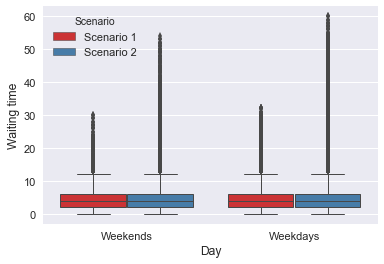

In [31]:
sn.boxplot(x="Day", y="Waiting time", hue="Scenario", data = dfboxplot, palette="Set1", linewidth=1)